# Champcar Endurance Race Analysis - Watkins Glen 2019
### Car No. 992 Millenial Motorsport

Endurace car racing is a team sport. Only one driver is in the car at a time, but the decisions of the team and the performance of the car can have a much greater effect on the final result in a race than outright driver performance. Decisions such as when to change drivers and what repairs to do while the car is in pit lane can make or break a race. 

TODO: explain endurance racing. 

Watkins Glen marked the beginning of the 2019 Champcar season for Millenial Motorsports. It was our second year as a team, and with only three races in the team's 2018 season meant that there were still major kinks that needed to be worked out both with the car itself and with the team's operations and strategy. 

Champcar provides lap data for download after each race event, and post-race analysis of this data can help us identify any errors we made as a team, compare our performace to the leaders, and help identify ways that we can be more competitive.  

In [21]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

Lap data is downloaded from mylaps.com as a csv. Overall data about the finishing positions of all the cars is availible, and more detailed data about individual cars is availible in a sub-menu. 

TODO: Write a script to download and aggregate detailed lap data for all competitors.

In [28]:
#Import CSV downloaded from mylaps.com
raw_data = pd.read_csv("Millennial_Motorsport_Laptimes_ChampCar_WatkinsGlen_2019_Saturday.csv");

#Set the Lap column to be the index for data
#For multiple cars the index may have to be the time into the race (0-8hrs)
raw_data = raw_data.set_index("Lap")

In [29]:
raw_data.head()

,Pos,Lap Time,Diff to Last Lap,Diff to Best Lap,Gap in Front,Diff to P1,Speed
Lap,,,,,,,
1,9,2:36.994,0.000,13.525,0.652,17.199,77.965 mi/h
2,8,2:26.199,-,2.730,0.256,25.235,83.722 mi/h
3,8,2:25.179,-,1.710,1.193,31.366,84.31 mi/h
4,9,2:25.369,0.190,1.900,0.355,30.907,84.2 mi/h
5,11,2:26.527,1.158,3.058,0.653,36.733,83.534 mi/h


In [52]:
def laptime_to_float(lapstr):
    time = lapstr.split(':')
    laptime_sec = float(time[0])*60+float(time[1])
    return laptime_sec

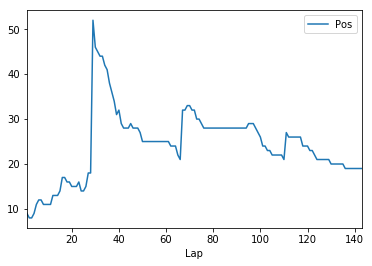

In [53]:
raw_data.plot(y="Pos", use_index=True)
plt.show()

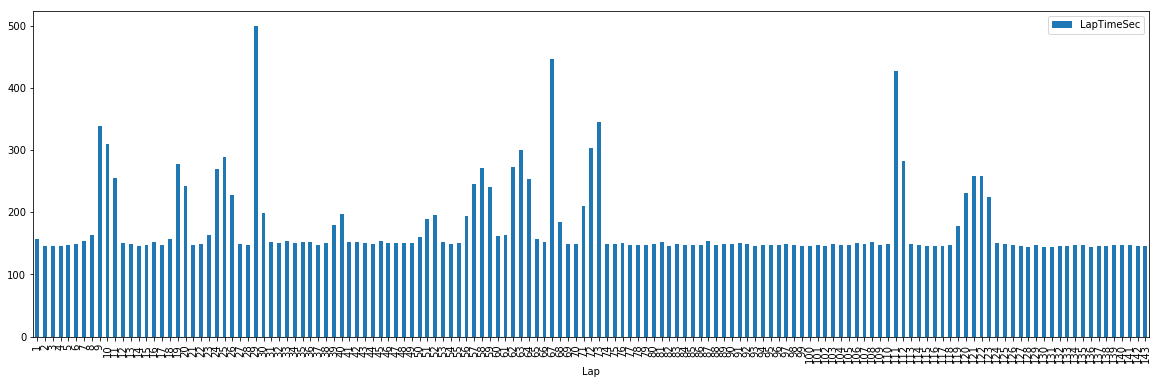

In [84]:
raw_data["LapTimeSec"] = raw_data["Lap Time"].apply(laptime_to_float)
raw_data.head()

#Set plot figure size
plt.rcParams["figure.figsize"] = (20,6)

#Plot lap time data
raw_data.plot.bar(y="LapTimeSec", use_index=True)
plt.show()

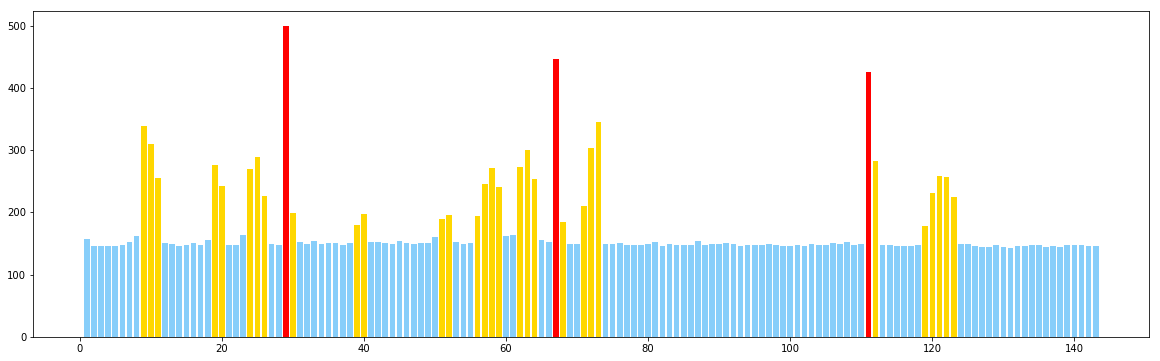

In [92]:
#Set plot figure size
#plt.rcParams["figure.figsize"] = (20,6)

#Plot lap time data
#raw_data.plot.bar(y="LapTimeSec", use_index=True)
#plt.show()

plt.figure()

#cleanlap = df[df['a']<5]
cleanlap = raw_data[raw_data["LapTimeSec"]<170]
yellowlap= raw_data[(raw_data["LapTimeSec"]>170) & (raw_data["LapTimeSec"]<350)]
pitlap = raw_data[raw_data["LapTimeSec"]>350]


plt.bar(cleanlap.index.values, cleanlap["LapTimeSec"], color='lightskyblue')
plt.bar(yellowlap.index.values, yellowlap["LapTimeSec"], color='gold')
plt.bar(pitlap.index.values, pitlap["LapTimeSec"], color='r')

plt.show()

#plt.bar(t1.index.values, t1['a'], color='tomato')
#plt.bar(t2.index.values, t2['a'], color='gold')

In [103]:
pit = pitlap.index.values

In [104]:
pit[0]

29